# Explore National Dataset

This notebook is used to explore the `rivm-covid-19-national.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd
import numpy as np

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/rivm-covid-19-national.csv")

In [3]:
df["PositiefGetest"] = df["PositiefGetest"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["Overleden"] = df["Overleden"].astype(int)
df["Datum"] = pd.to_datetime(df["Datum"])

## Inspect dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PositiefGetest  294 non-null    int64         
 1   Opgenomen       294 non-null    int64         
 2   Overleden       294 non-null    int64         
 3   Datum           294 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 9.3 KB


In [5]:
df.head()

,PositiefGetest,Opgenomen,Overleden,Datum
0,1,0,0,2020-02-27
1,2,0,0,2020-02-28
2,7,0,0,2020-02-29
3,10,0,0,2020-03-01
4,18,0,0,2020-03-02


In [6]:
df.tail()

,PositiefGetest,Opgenomen,Overleden,Datum
289,603603,18396,10019,2020-12-12
290,613487,18477,10048,2020-12-13
291,621944,18552,10082,2020-12-14
292,628577,18618,10168,2020-12-15
293,639746,18684,10246,2020-12-16


## Visualize total (per day)

<AxesSubplot:xlabel='Datum'>

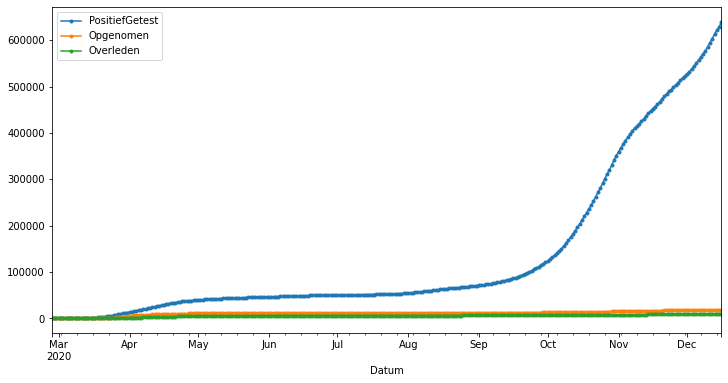

In [7]:
df.plot(
    x="Datum",
    y=["PositiefGetest", "Opgenomen", "Overleden"],
    figsize=(12,6),
    style=".-",
)

## Visualize difference (per day)

In [8]:
df["PositiefGetestDiff"] = df["PositiefGetest"].diff()
df["OpgenomenDiff"] = df["Opgenomen"].diff()
df["OverledenDiff"] = df["Overleden"].diff()

<AxesSubplot:xlabel='Datum'>

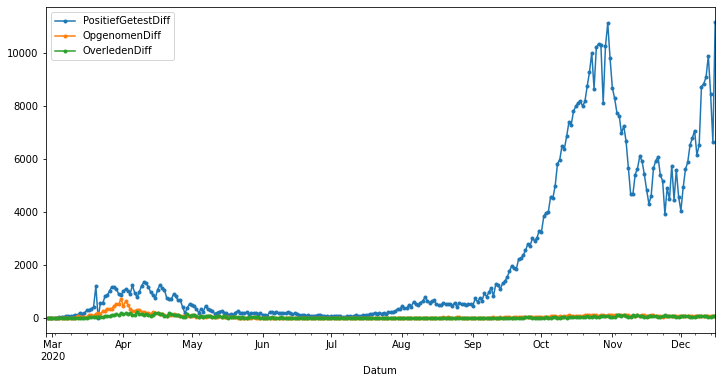

In [9]:
df.plot(
    x="Datum",
    y=["PositiefGetestDiff", "OpgenomenDiff", "OverledenDiff"],
    figsize=(12,6),
    style=".-",
)